# Boosting and Stacking Mini Project

This mini project aims to test my understanding of boosting and stacking. While I will do my best to implement these techniques, I am aware that they are computationally intensive, and my current resources may not be sufficient to fully support them.

**Import the required libraries and methods:**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier, StackingClassifier, BaggingClassifier, RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


from sklearn.preprocessing import LabelEncoder


from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score, precision_recall_fscore_support, confusion_matrix

**Load and explore the Dataset.**

In this project, I will use the Human Activity Recognition with Smartphones (HAR) dataset. This dataset was collected from participants performing daily living activities (ADL) while carrying a smartphone equipped with inertial sensors. The goal is to classify each observation into one of six activities: walking, walking upstairs, walking downstairs, sitting, standing, or laying.

Each record in the dataset contains:

-Triaxial acceleration data from the accelerometer, including both total and estimated body acceleration.

-Triaxial angular velocity measurements from the gyroscope.

-A 561-dimensional feature vector derived from time and frequency domain variables.

-The corresponding activity label.

In [3]:
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML241EN-SkillsNetwork/labs/datasets/Human_Activity_Recognition_Using_Smartphones_Data.csv", sep=',')

In [3]:
data.info()

data.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10299 entries, 0 to 10298
Columns: 562 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), object(1)
memory usage: 44.2+ MB


,count,mean,std,min,25%,50%,75%,max
tBodyAcc-mean()-X,10299.0,0.274347,0.067628,-1.0,0.262625,0.277174,0.288354,1.0
tBodyAcc-mean()-Y,10299.0,-0.017743,0.037128,-1.0,-0.024902,-0.017162,-0.010625,1.0
tBodyAcc-mean()-Z,10299.0,-0.108925,0.053033,-1.0,-0.121019,-0.108596,-0.097589,1.0
tBodyAcc-std()-X,10299.0,-0.607784,0.438694,-1.0,-0.992360,-0.943030,-0.250293,1.0
tBodyAcc-std()-Y,10299.0,-0.510191,0.500240,-1.0,-0.976990,-0.835032,-0.057336,1.0
...,...,...,...,...,...,...,...,...
"angle(tBodyGyroMean,gravityMean)",10299.0,0.017683,0.616188,-1.0,-0.493108,0.017192,0.536137,1.0
"angle(tBodyGyroJerkMean,gravityMean)",10299.0,-0.009219,0.484770,-1.0,-0.389041,-0.007186,0.365996,1.0
"angle(X,gravityMean)",10299.0,-0.496522,0.511158,-1.0,-0.817288,-0.715631,-0.521503,1.0
"angle(Y,gravityMean)",10299.0,0.063255,0.305468,-1.0,0.002151,0.182028,0.250790,1.0


In [5]:
le = LabelEncoder()

data['Activity'] = le.fit_transform(data['Activity'])

data.Activity.unique()

array([2, 1, 0, 3, 4, 5])

In [4]:
features = [x for x in data.columns if x != 'Activity']

X = data[features]
y = data['Activity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7209, 561), (3090, 561), (7209,), (3090,))

The next step is to fit Gradient Boosted Tree models while keeping all hyperparameters at their default values. The models will be trained using different numbers of trees (n_estimators = [15, 25, 50, 100, 200, 400]), and their performance will be evaluated in terms of classification accuracy on the test dataset.

In [6]:
error_list = list()

tree_list = [15, 25, 50, 100, 200, 400]

for tree in tree_list:
    GBC = GradientBoostingClassifier(n_estimators=tree, random_state=42)
    print('Fitting the model with {} trees'.format(tree))
    GBC.fit(X_train, y_train)
    y_pred = GBC.predict(X_test)

    error = 1 - accuracy_score(y_test, y_pred)
    error_list.append(pd.Series({'n_estimators': tree, 'error': error}))

error_df = pd.concat(error_list, axis=1).T.set_index('n_estimators')
error_df

Fitting the model with 15 trees
Fitting the model with 25 trees
Fitting the model with 50 trees
Fitting the model with 100 trees
Fitting the model with 200 trees
Fitting the model with 400 trees


,error
n_estimators,
15.0,0.051133
25.0,0.034304
50.0,0.019741
100.0,0.012945
200.0,0.011974
400.0,0.011650


In [7]:
error_df

,error
n_estimators,
15.0,0.051133
25.0,0.034304
50.0,0.019741
100.0,0.012945
200.0,0.011974
400.0,0.011650


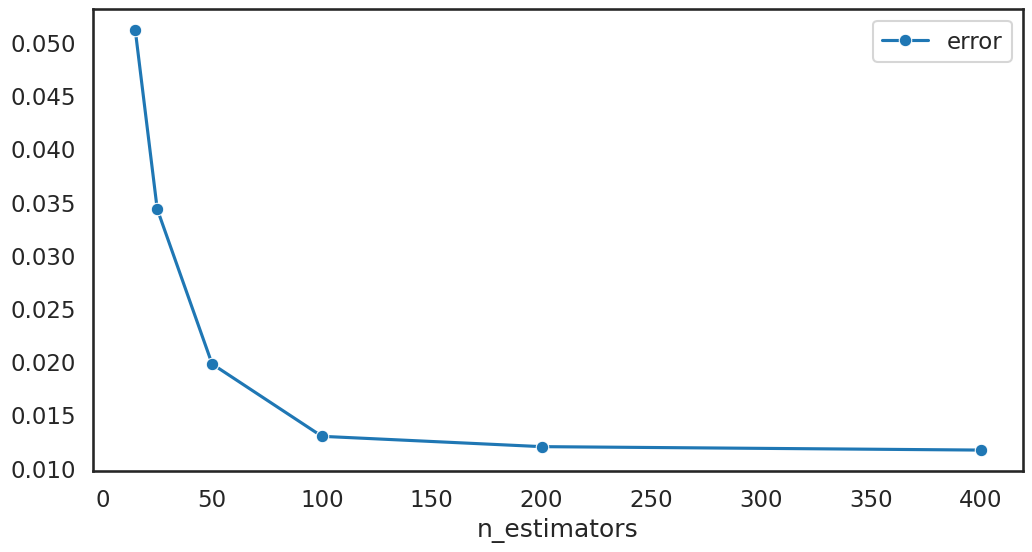

In [8]:
sns.set_context('talk')
sns.set_style('white')
plt.figure(figsize=(12,6))
sns.lineplot(data=error_df, markers=True)
plt.show()


After approximately three hours of hyperparameter tuning, the optimal configuration for the Gradient Boosted Tree model was found to be:

n_estimators = 400

learning_rate = 0.1

subsample = 0.5

max_features = 4

This parameter set achieved the best performance during cross-validation.

In [6]:
model = GradientBoostingClassifier(n_estimators=400, learning_rate=0.1, subsample=0.5, max_features=4, random_state=42)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       597
           SITTING       0.97      0.96      0.97       563
          STANDING       0.96      0.97      0.97       547
           WALKING       1.00      1.00      1.00       539
WALKING_DOWNSTAIRS       1.00      0.99      0.99       420
  WALKING_UPSTAIRS       0.99      0.99      0.99       424

          accuracy                           0.99      3090
         macro avg       0.99      0.99      0.99      3090
      weighted avg       0.99      0.99      0.99      3090



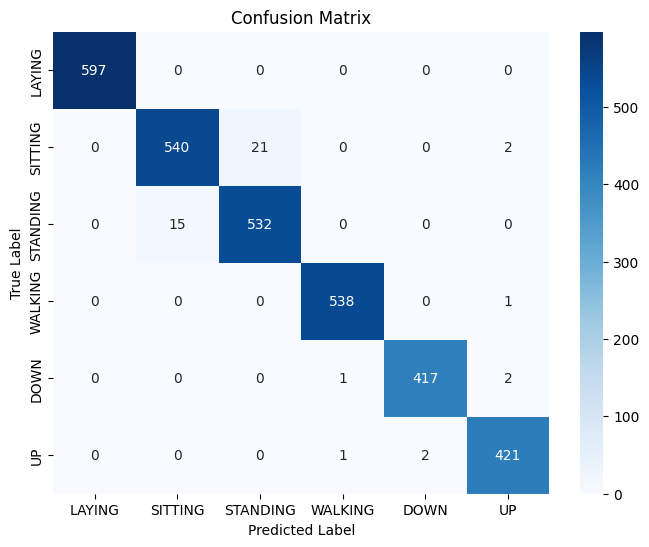

In [7]:
cm = confusion_matrix(y_test, y_pred)

labels = ["LAYING", "SITTING", "STANDING", "WALKING", "DOWN", "UP"]

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

The classification report and confusion matrix demonstrate that the Gradient Boosted Tree model achieved excellent performance on the HAR dataset.

LAYING and WALKING were predicted perfectly, with precision, recall, and F1-score of 1.00.

SITTING and STANDING achieved precision and recall between 0.96 and 0.97, indicating very few misclassifications.

WALKING_DOWNSTAIRS and WALKING_UPSTAIRS were classified with nearly perfect scores (0.99), showing minimal confusion between these activities.

The confusion matrix supports these findings, showing that most predictions lie along the diagonal, representing correct classifications. Misclassifications were rare and primarily occurred between similar activities, such as SITTING and STANDING, or between WALKING_UPSTAIRS and WALKING_DOWNSTAIRS. Overall, the results indicate that the tuned Gradient Boosted Tree model is highly effective for human activity recognition in this dataset.

Due to computational constraints and the lengthy training times, further experiments with alternative boosting methods and stacking were not performed. The project concludes here, having achieved strong results with the current approach. These additional experiments may be explored in the future when adequate computational resources are available or when using smaller datasets.